# 1. Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import optuna
import warnings
warnings.filterwarnings('ignore')

C:\Users\Yehia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Load Dataset

In [2]:
url = "healthcare-dataset-stroke-data.csv"
stroke_data = pd.read_csv(url)

In [3]:
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# 3. Data Exploration and Visualization

## 3.1 Data Analysis

In [4]:
print(stroke_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [5]:
print(stroke_data.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [6]:
print(stroke_data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


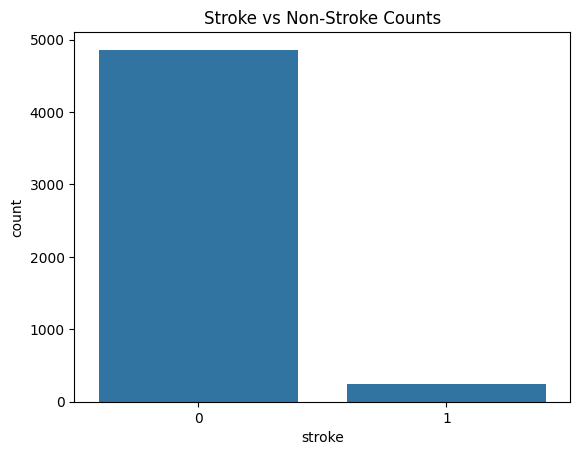

In [7]:
sns.countplot(x='stroke', data=stroke_data)
plt.title('Stroke vs Non-Stroke Counts')
plt.show()

## 3.2 Heatmap

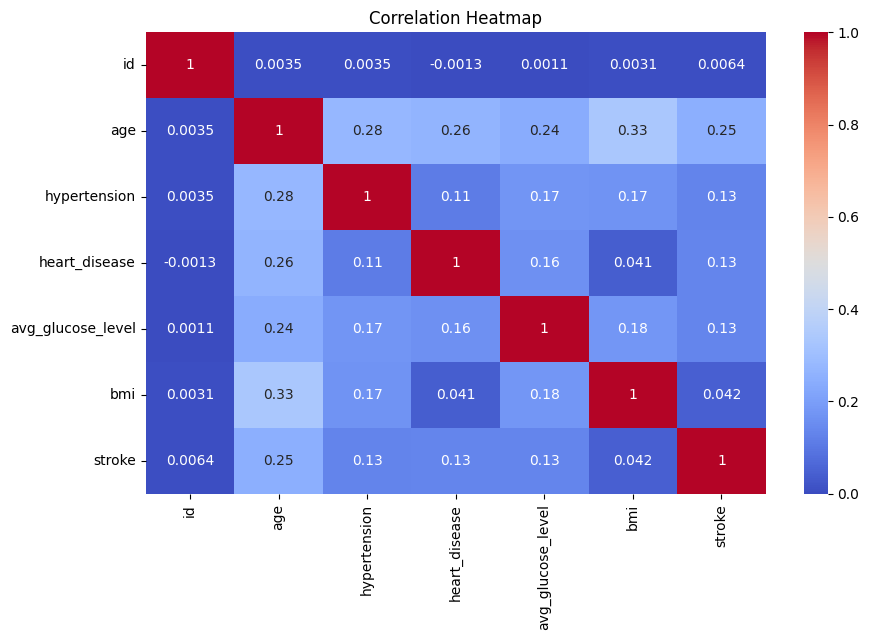

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(stroke_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 3.3 Pairplot on selected features

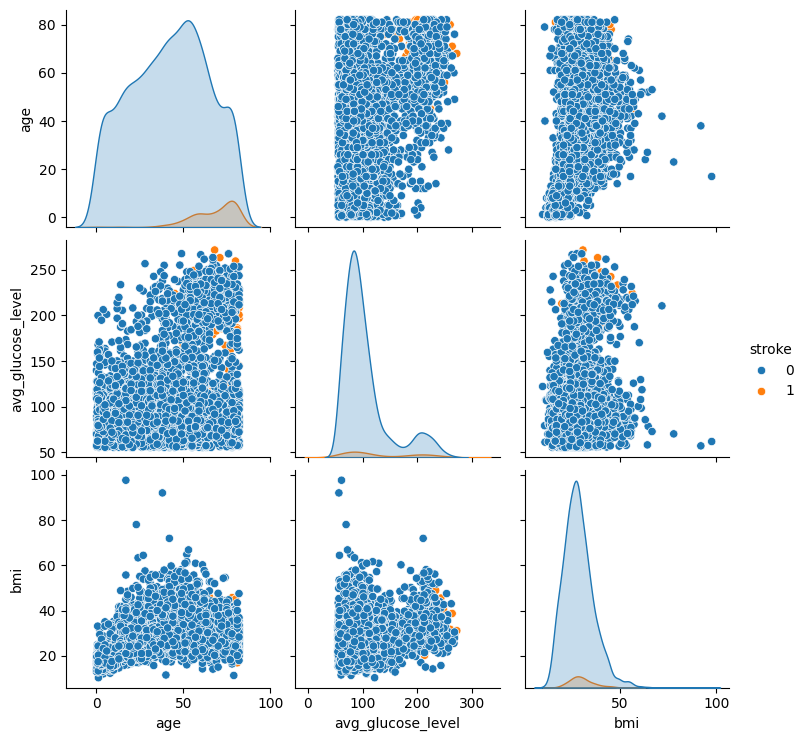

In [9]:
sns.pairplot(stroke_data, hue='stroke', vars=['age', 'avg_glucose_level', 'bmi'])
plt.show()

# 4. Data Cleaning and Preprocessing

In [10]:
#  Drop unnecessary columns and handle missing values
stroke_data.drop(['id'], axis=1, inplace=True)
stroke_data['bmi'].fillna(stroke_data['bmi'].mean(), inplace=True)

In [11]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [12]:
# Remove incorrect values (e.g., age <= 1 or bmi <= 10)
stroke_data = stroke_data[(stroke_data['age'] >= 1) & (stroke_data['bmi'] > 10) & (stroke_data['avg_glucose_level'] > 0)]

In [13]:
# Remove outliers using IQR method for 'age', 'bmi', 'avg_glucose_level'
for col in ['age', 'bmi', 'avg_glucose_level']:
    Q1 = stroke_data[col].quantile(0.25)
    Q3 = stroke_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    stroke_data = stroke_data[(stroke_data[col] >= lower_bound) & (stroke_data[col] <= upper_bound)]

## 4.1 Encode categorical variables

In [14]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()
for col in categorical_cols:
    stroke_data[col] = le.fit_transform(stroke_data[col])

In [15]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


## 4.2 Train-test split

In [16]:
# Split the data into training, validation, and test sets
X = stroke_data.drop('stroke', axis=1)
y = stroke_data['stroke']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 60/20/20 split

In [17]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4879,1,3.00,0,0,0,4,1,81.88,18.0,0
3678,0,5.00,0,0,0,4,0,123.49,19.5,0
2413,0,58.00,0,0,1,2,0,100.42,39.5,3
2841,0,57.00,0,0,1,2,0,93.85,29.1,2
3424,1,66.00,0,0,1,2,0,81.11,28.8,1
...,...,...,...,...,...,...,...,...,...,...
4806,1,15.00,0,0,0,2,1,137.27,19.3,2
1134,1,1.56,0,0,0,4,0,93.74,20.1,0
1488,0,5.00,0,0,0,4,1,129.01,17.2,0
473,0,43.00,0,0,1,0,0,70.08,26.6,2


## 4.3 Normalization

In [18]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 5. Dimensionality Reduction

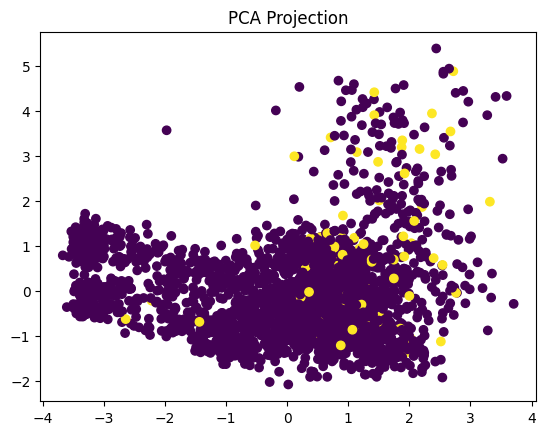

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
plt.title('PCA Projection')
plt.show()

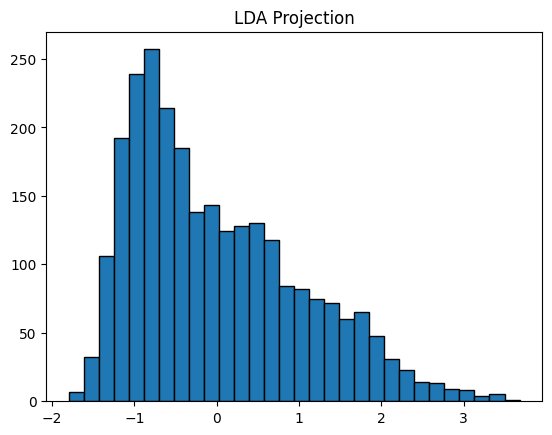

In [20]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_train_scaled, y_train)
plt.hist(X_lda, bins=30, edgecolor='k')
plt.title('LDA Projection')
plt.show()

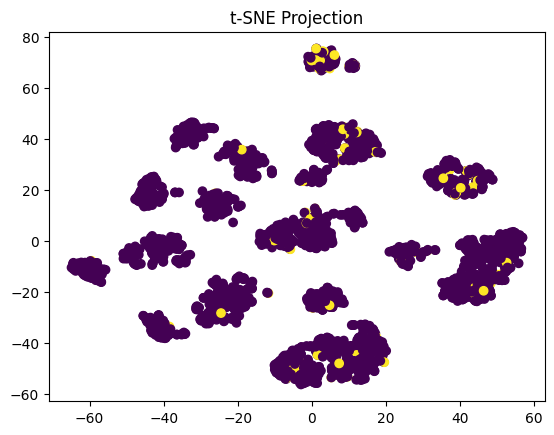

In [21]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train)
plt.title('t-SNE Projection')
plt.show()

# 6. Train Classifiers

## 6.1 Naive Bayes

In [22]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

## 6.2 SVM

In [23]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

### 6.2.1 Grid Search for SVM

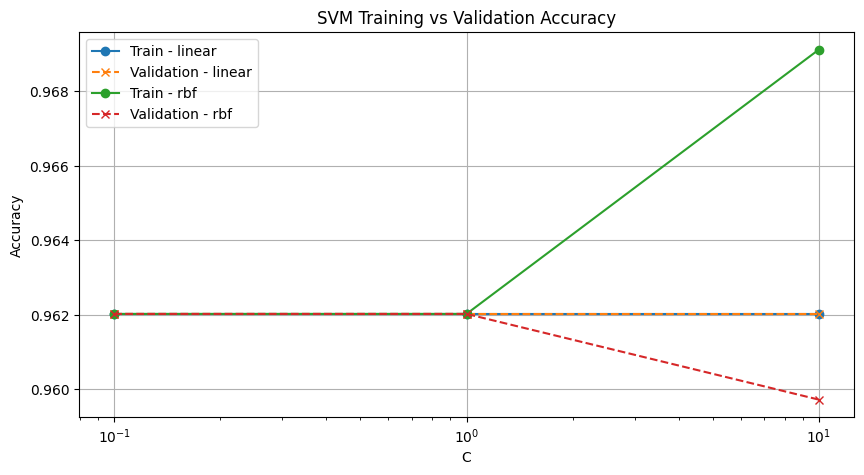

In [24]:
# Grid Search for SVM with accuracy plotting
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=3, return_train_score=True)
svm_grid.fit(X_train_scaled, y_train)
best_svm = svm_grid.best_estimator_

# Plot training and validation accuracy for SVM
results_df = pd.DataFrame(svm_grid.cv_results_)
plt.figure(figsize=(10, 5))
for kernel in svm_params['kernel']:
    mask = results_df['param_kernel'] == kernel
    plt.plot(results_df[mask]['param_C'], results_df[mask]['mean_train_score'], label=f"Train - {kernel}", marker='o')
    plt.plot(results_df[mask]['param_C'], results_df[mask]['mean_test_score'], label=f"Validation - {kernel}", linestyle='--', marker='x')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()

## 6.3 Optuna Search for Decision Tree

[I 2025-04-20 17:58:13,499] A new study created in memory with name: no-name-0245aa8a-ca87-4da7-ad86-28ec2ec9ec43
[I 2025-04-20 17:58:13,511] Trial 0 finished with value: 0.9436133486766398 and parameters: {'max_depth': 20, 'min_samples_split': 9}. Best is trial 0 with value: 0.9436133486766398.
[I 2025-04-20 17:58:13,523] Trial 1 finished with value: 0.9413118527042578 and parameters: {'max_depth': 14, 'min_samples_split': 6}. Best is trial 0 with value: 0.9436133486766398.
[I 2025-04-20 17:58:13,532] Trial 2 finished with value: 0.9643268124280783 and parameters: {'max_depth': 4, 'min_samples_split': 7}. Best is trial 2 with value: 0.9643268124280783.
[I 2025-04-20 17:58:13,543] Trial 3 finished with value: 0.9390103567318757 and parameters: {'max_depth': 19, 'min_samples_split': 4}. Best is trial 2 with value: 0.9643268124280783.
[I 2025-04-20 17:58:13,552] Trial 4 finished with value: 0.9378596087456847 and parameters: {'max_depth': 20, 'min_samples_split': 2}. Best is trial 2 with

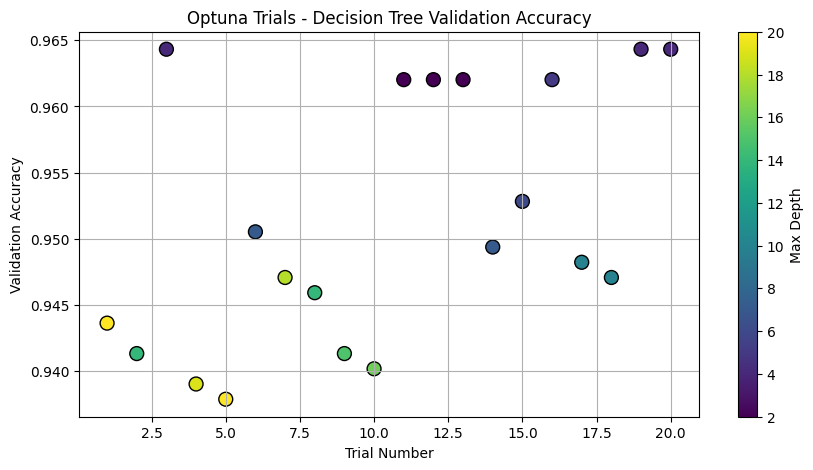

In [25]:
# Optuna Search for Decision Tree
optuna_scores = []
optuna_params = []

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    clf.fit(X_train_scaled, y_train)
    val_score = clf.score(X_val_scaled, y_val)
    optuna_scores.append(val_score)
    optuna_params.append((max_depth, min_samples_split))
    return val_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
best_params = study.best_params

# Plot Decision Tree validation accuracy from Optuna trials
depths = [p[0] for p in optuna_params]
splits = [p[1] for p in optuna_params]
plt.figure(figsize=(10, 5))
plt.scatter(range(1, len(optuna_scores)+1), optuna_scores, c=depths, cmap='viridis', s=100, edgecolor='k')
plt.colorbar(label='Max Depth')
plt.title('Optuna Trials - Decision Tree Validation Accuracy')
plt.xlabel('Trial Number')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

# 6.4 KNN

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

# 6.5 Decision Tree

In [27]:
dt = DecisionTreeClassifier(**best_params)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=7)

# 7. Testing and Evaluation


Naive Bayes Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       836
           1       0.16      0.36      0.22        33

    accuracy                           0.90       869
   macro avg       0.57      0.64      0.59       869
weighted avg       0.94      0.90      0.92       869



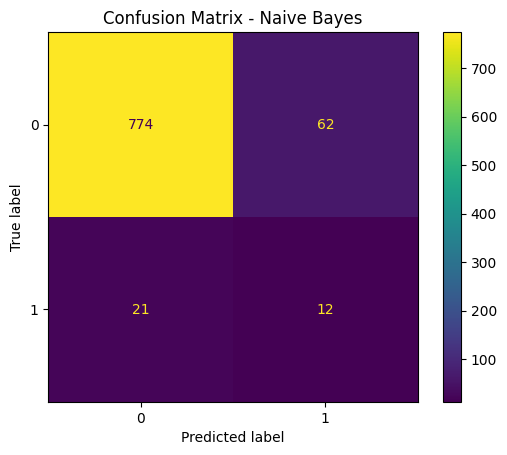


SVM Evaluation:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       836
           1       0.00      0.00      0.00        33

    accuracy                           0.96       869
   macro avg       0.48      0.50      0.49       869
weighted avg       0.93      0.96      0.94       869



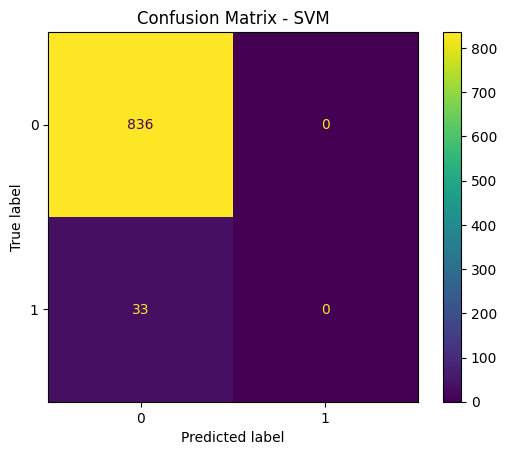

In [ ]:
models = {
    "Naive Bayes": nb,
    "SVM": best_svm,
    "KNN": knn,
    "Decision Tree": dt
}

for name, model in models.items():
    print(f"\n{name} Evaluation:")
    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.904488,0.162162,0.363636,0.224299
1,SVM,0.962025,0.000000,0.000000,0.000000


<Figure size 1200x600 with 0 Axes>

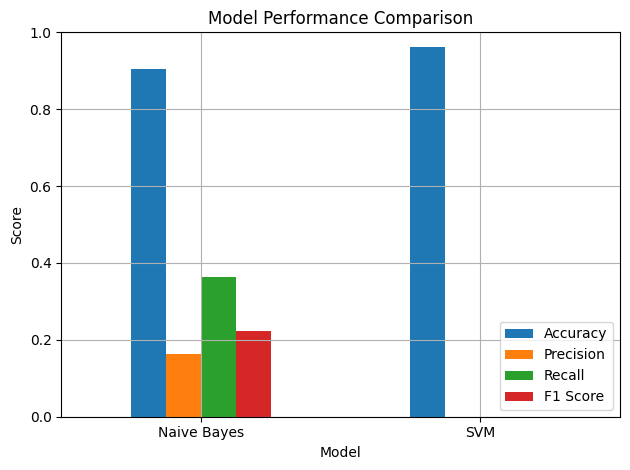

✅ The best performing model for stroke prediction based on F1 Score is: **Naive Bayes**


In [34]:
# Collect evaluation scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, zero_division=0))
    metrics['Recall'].append(recall_score(y_test, y_pred, zero_division=0))
    metrics['F1 Score'].append(f1_score(y_test, y_pred, zero_division=0))

# Convert to DataFrame for display
metrics_df = pd.DataFrame(metrics)
metrics_df.sort_values(by='F1 Score', ascending=False, inplace=True)
display(metrics_df)

# Plot performance comparison
plt.figure(figsize=(12, 6))
metrics_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Identify best model based on F1 Score
best_model_name = metrics_df.iloc[0]['Model']
print(f"✅ The best performing model for stroke prediction based on F1 Score is: **{best_model_name}**")


# 8. Clustering

## 8.1 Hierarchical Clustering

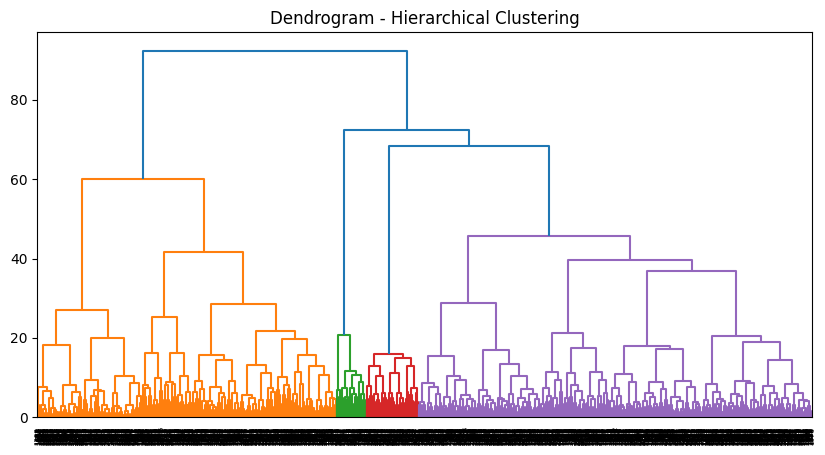

In [30]:
linked = linkage(X_train_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram - Hierarchical Clustering')
plt.show()

## 8.2 KMeans Clustering

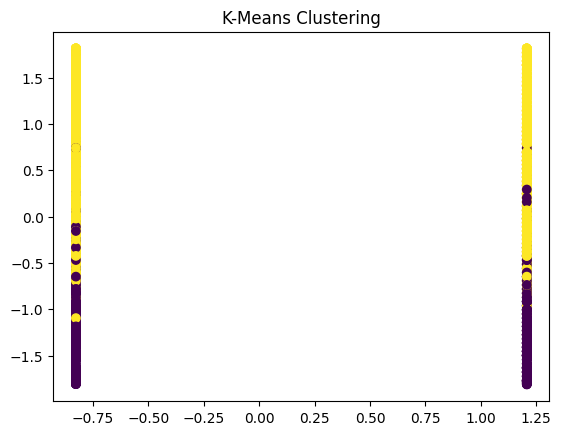

In [31]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering')
plt.show()

# 8.3 Compare clustering to true labels


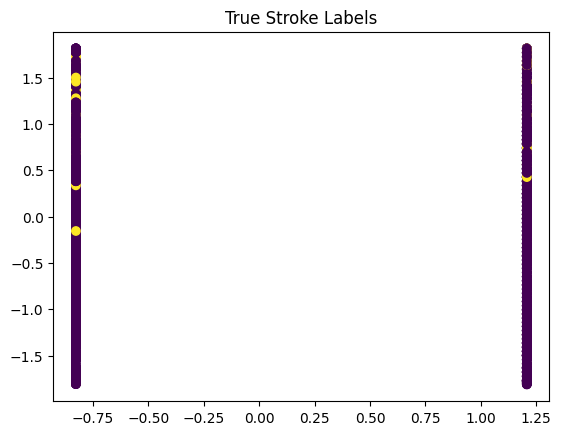

In [32]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train)
plt.title('True Stroke Labels')
plt.show()